In [2]:
import numpy as np
import matplotlib.pyplot as plt

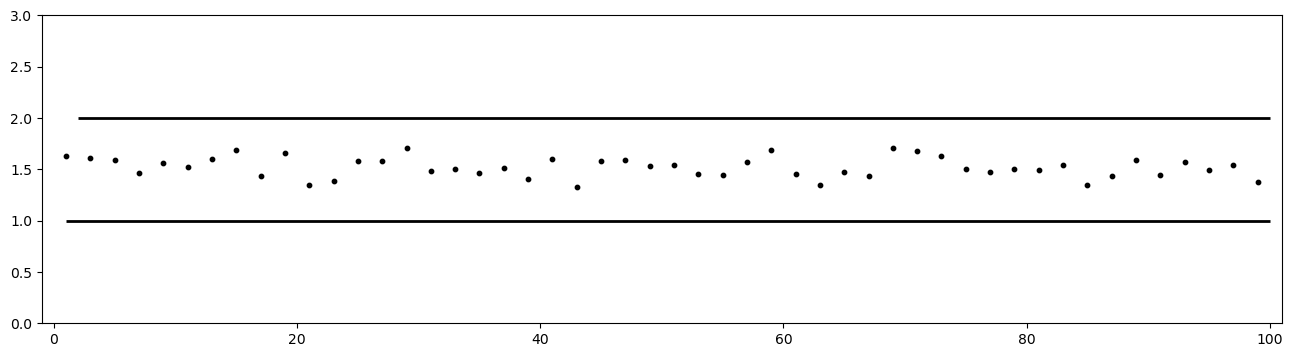

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

# create a road
ax.hlines(1, 1, 100, color='k', lw=2)
ax.hlines(2, 2, 100, color='k', lw=2)

x = np.arange(1, 100, 2)
y = np.repeat(1.5, 50) + np.random.normal(0, 0.1, 50)
ax.scatter(x, y, s=10, color='k')

ax.set_xlim(-1, 101)
ax.set_ylim(0, 3)

plt.show()

In [4]:
class Car(object):
    def __init__(self, length=100.0):
        """
        Creates car and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets a car coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle(max 90 degree)
        distance = total distance driven, most be non-negative
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = np.random.normal(steering, self.steering_noise)
        distance2 = np.random.normal(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

In [5]:
car = Car()

Kp = 1.0
speed = 1.0

car.set(0, 1.5, 0)

x_trajectory = []
y_trajectory = []

for _ in range(100):
    steering = -Kp*car.y
    car.move(steering, speed)
    
    x_trajectory.append(car.x)
    y_trajectory.append(car.y)

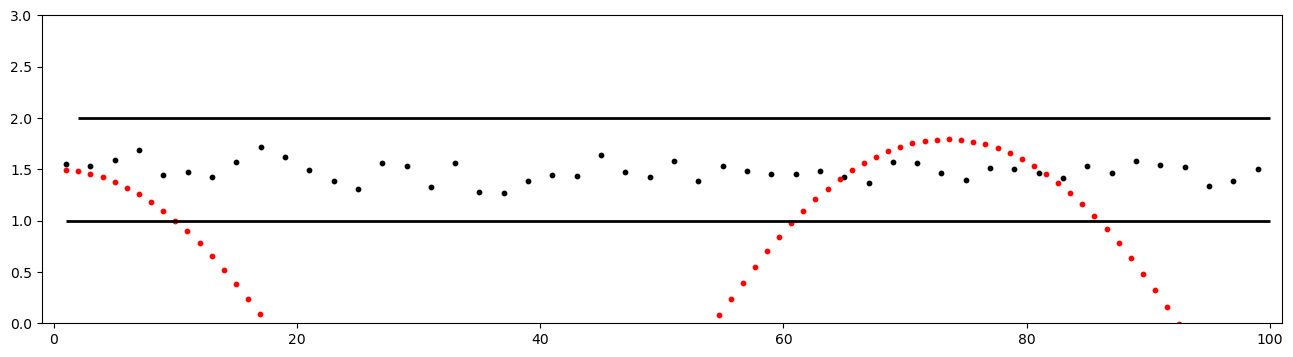

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))

# create a road
ax.hlines(1, 1, 100, color='k', lw=2)
ax.hlines(2, 2, 100, color='k', lw=2)

x = np.arange(1, 100, 2)
y = np.repeat(1.5, 50) + np.random.normal(0, 0.1, 50)
ax.scatter(x, y, s=10, color='k')
ax.scatter(x_trajectory, y_trajectory, s=10, color='r')

ax.set_xlim(-1, 101)
ax.set_ylim(0, 3)

plt.show()